<a href="https://colab.research.google.com/github/anaguilarar/WeatherSoilDataProcessor/blob/main/weathersoildata_processor_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##

## Download and process Weather and soil data

This notebook provides an example of how to download and process historical weather and soil data. For weather data, two datasets are used: [CHIRPS](https://www.chc.ucsb.edu/data/chirps) and [AgEra5](https://www.earthinformatics.eu/tools/
agera5-global-weather-data-set-tailored-agriculture). For soil data, we will use data from [SoilGrids](https://soilgrids.org/).

#### clone repository

In [1]:
!git clone https://github.com/anaguilarar/WeatherSoilDataProcessor.git

Cloning into 'WeatherSoilDataProcessor'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 4), reused 41 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 33.27 MiB | 21.23 MiB/s, done.
Resolving deltas: 100% (4/4), done.


### install requirements

In [2]:
!pip install -r WeatherSoilDataProcessor/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.6 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
import os

os.chdir('/content/WeatherSoilDataProcessor/')


### Create Weather information Data Cube
In this section, we will create a weather data cube to organize and process weather information across a given time range. The data cube will enable multi-temporal analysis of various weather variables, including precipitation, maximum temperature, minimum temperature, and solar radiation


#### Download data
First, we load the configuration file that defines the parameters for the weather data download, such as the time period, geographical extent, and the output folder path.
For agera5 it is neccesary to configurate the .cdsapirc with the CDS API client. This file should be located in

Those parameters are pointed out on a configuration file called **"weather_data_downloading_donfig.yaml"**


In [20]:
YOURUSERAPICODE = ''#
YOUREMAIL = 'andres.aguilar@cgiar.org'

with open("/root/.cdsapirc", "w") as f:
  f.write("url: https://cds.climate.copernicus.eu/api\nkey: {}\nemail: ".format(YOURUSERAPICODE, YOUREMAIL))

In [21]:
from spatialdata.climate_data import MLTWeatherDataCube, ClimateDataDonwload
from spatialdata.gis_functions import get_boundaries_from_path

config = OmegaConf.load("options/weather_data_downloading_config.yaml")

if config.SPATIAL_INFO.get('spatial_file',None):
    extent = get_boundaries_from_path(config.SPATIAL_INFO.get('spatial_file',None), round_numbers = True)
else:
    extent = config.SPATIAL_INFO.extent

print(f"from {config.DATES.starting_date} to {config.DATES.ending_date}" )
climatedata = ClimateDataDonwload(starting_date= config.DATES.starting_date,
                                    ending_date= config.DATES.ending_date,
                                    xyxy= extent,
                                    output_folder= config.PATHS.output_path)

climatedata.download_weather_information(config.WEATHER.variables, suffix_output_folder=config.GENERAL.suffix)

from 2001-01-01 to 2002-08-31
2001 {'version': '1_1', 'area': [17, -90, 12, -83], 'variable': ['solar_radiation_flux'], 'statistic': [''], 'year': ['2001'], 'month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], 'day': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']}


2024-10-10 18:33:19,314 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:cads_api_client.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-10-10 18:33:19,318 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informa

ae7a44cdd58216f2f10c967410657099.zip:   0%|          | 0.00/12.8M [00:00<?, ?B/s]

2002 {'version': '1_1', 'area': [17, -90, 12, -83], 'variable': ['solar_radiation_flux'], 'statistic': [''], 'year': ['2002'], 'month': ['01', '02', '03', '04', '05', '06', '07', '08'], 'day': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']}


2024-10-10 18:33:27,346 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:cads_api_client.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-10-10 18:33:27,351 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informa

d9ed84225a4c8f50ed4eb59134c9ad65.zip:   0%|          | 0.00/8.54M [00:00<?, ?B/s]

2001 {'version': '1_1', 'area': [17, -90, 12, -83], 'variable': ['2m_temperature'], 'statistic': ['24_hour_maximum'], 'year': ['2001'], 'month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], 'day': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']}


2024-10-10 18:39:51,106 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:cads_api_client.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-10-10 18:39:51,112 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informa

8a843b1cf6dcb8c6234ba984335647ab.zip:   0%|          | 0.00/12.4M [00:00<?, ?B/s]

2002 {'version': '1_1', 'area': [17, -90, 12, -83], 'variable': ['2m_temperature'], 'statistic': ['24_hour_maximum'], 'year': ['2002'], 'month': ['01', '02', '03', '04', '05', '06', '07', '08'], 'day': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']}


2024-10-10 18:39:58,897 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:cads_api_client.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-10-10 18:39:58,904 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informa

809f06f49180995cc92cf830c1df2ea7.zip:   0%|          | 0.00/8.25M [00:00<?, ?B/s]

2001 {'version': '1_1', 'area': [17, -90, 12, -83], 'variable': ['2m_temperature'], 'statistic': ['24_hour_minimum'], 'year': ['2001'], 'month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], 'day': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']}


2024-10-10 18:52:23,981 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:cads_api_client.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-10-10 18:52:23,987 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informa

bed00304079be39de8022a3703264c7a.zip:   0%|          | 0.00/12.3M [00:00<?, ?B/s]

2002 {'version': '1_1', 'area': [17, -90, 12, -83], 'variable': ['2m_temperature'], 'statistic': ['24_hour_minimum'], 'year': ['2002'], 'month': ['01', '02', '03', '04', '05', '06', '07', '08'], 'day': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']}


2024-10-10 18:52:32,359 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:cads_api_client.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-10-10 18:52:32,365 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informa

bba89de4f11292ec1df2be916a4bd405.zip:   0%|          | 0.00/8.23M [00:00<?, ?B/s]

#### Setup Directory Paths and Variables to Fetch

Next, we define the directory paths where the downloaded weather data were be saved. These paths store different types of weather data, including precipitation, minimum and maximum temperatures, and solar radiation.

In [4]:
## paths
precipitation_path = r'weather/precipitation_hnd_raw'
#tmintemperature_path = r'weather/temperature_tmin_hnd_raw'
#tmaxtemperature_path = r'weather/temperature_tmax_hnd_raw'
solarradiation_path = r'weather/solar_radiation_hnd_raw'


list_weather_paths = {'precipitation': precipitation_path,
#                    'tmin':tmintemperature_path,
#                    'tmax': tmaxtemperature_path,
                    'srad':solarradiation_path}




#### Manage and Create Weather Data Cube
We now set up an instance of the MLTWeatherDataCube class, which manages the downloaded weather data and allows us to process it over time. We specify the date range and create a data cube that handles multi-temporal data from various sources.

* The ***multitemporal_data*** function retrieves weather data across multiple time periods. Since each dataset might have a different spatial resolution, we can designate one of the variables as a reference. The spatial resolution of this reference variable will then be applied to all weather data layers to ensure consistency.

In [5]:
from spatialdata.files_manager import IntervalFolderManager
from spatialdata.climate_data import MLTWeatherDataCube

starting_date = '2001-02-21'
ending_date = '2001-11-15'

folder_manager = IntervalFolderManager()

wdatacube = MLTWeatherDataCube(list_weather_paths, folder_manager)

filnames = wdatacube.common_dates_and_file_names(starting_date=starting_date, ending_date=ending_date)
mltdata = wdatacube.multitemporal_data(reference_variable='precipitation')



weather/precipitation_hnd_raw/2001
weather/solar_radiation_hnd_raw/2001


100%|██████████| 268/268 [00:08<00:00, 31.18it/s]


#### Standardize Units

To ensure consistency across the dataset, we standardize the units of the weather variables. For instance, solar radiation is converted from joules to megajoules, and temperatures are converted from Kelvin to Celsius.


In [6]:
mltdata_c = {}
for d, v in mltdata.items():
    v['srad'] = v['srad'] / 1000000  # Convert solar radiation from J.m-2.day-1 to MJ.m-2.day-1
    #v['tmax'] = v['tmax'] - 273.15  # Convert temperature from Kelvin to Celsius
    #v['tmin'] = v['tmin'] - 273.15  # Convert temperature from Kelvin to Celsius
    mltdata_c[d] = v



#### Get Data for each "Aldea"

In previous example, we extracted data for a bigger extentsio, now we will extract and visualize data for a specific locality, in this case "Aldea" in Honduras.

Finally, we visualize the standardized weather data using maps and time series.

In [8]:
gdf = gpd.read_file('data/tb_limitealdeas.shp')
print(gdf.columns)
categories_column_name = "ALDEA"
subset = gdf.loc[gdf.KM2>50]

Index(['GEOCODIGO', 'ALDEA', 'COD_ALDEA', 'COD_MUNI', 'COD_DEPTO', 'KM2',
       'DENSIDAD', 'MUNI', 'DEPTO', 'AREA_HA', 'geometry'],
      dtype='object')


Dropdown(description='Select (area > 50km2) ALDEA', options=('Agalteca', 'Agua Blanca', 'Agua Blanca', 'Agua C…

Output(layout=Layout(height='400px'))

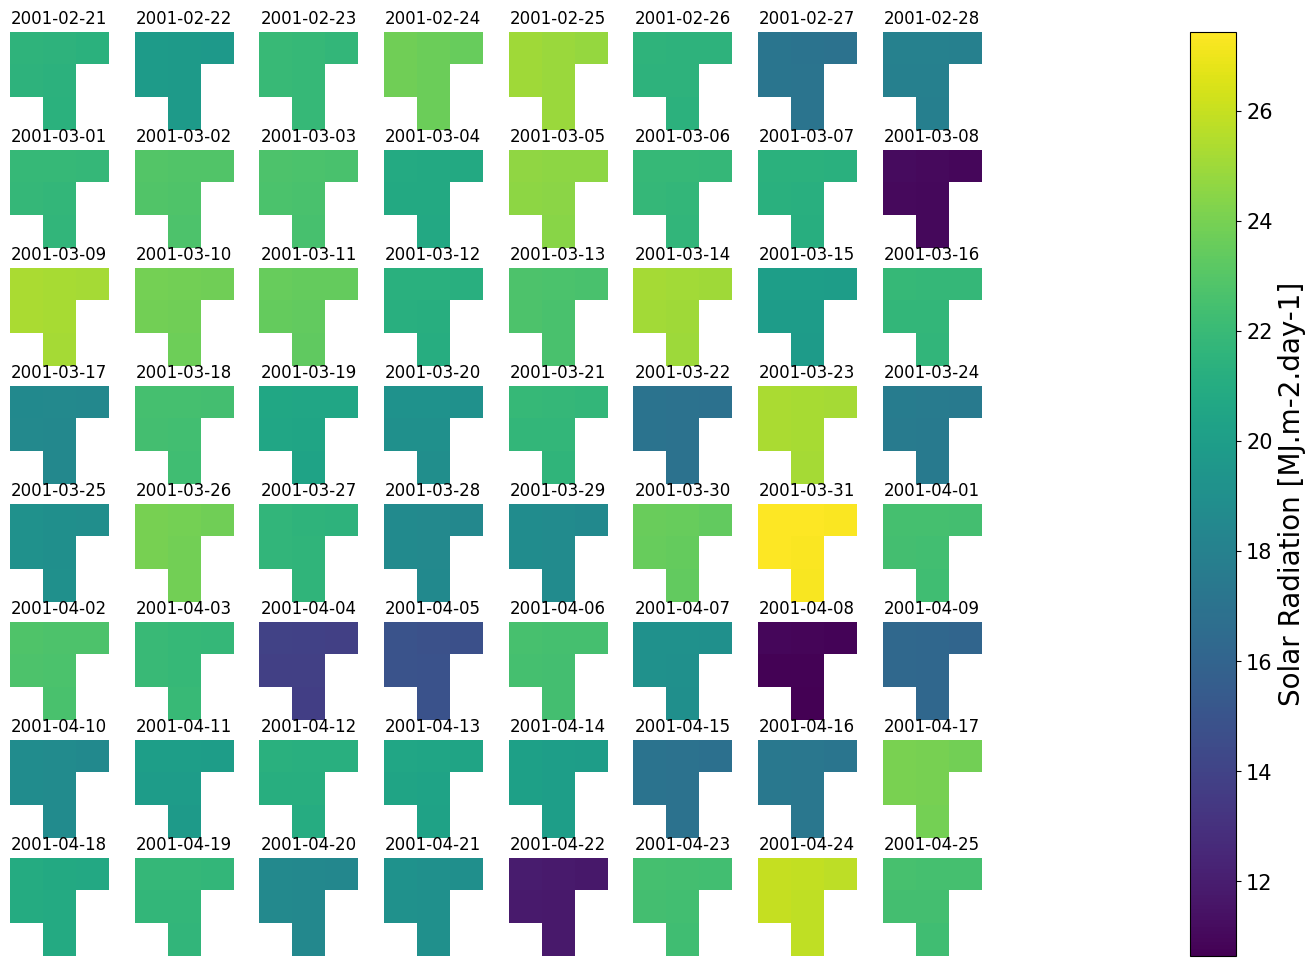

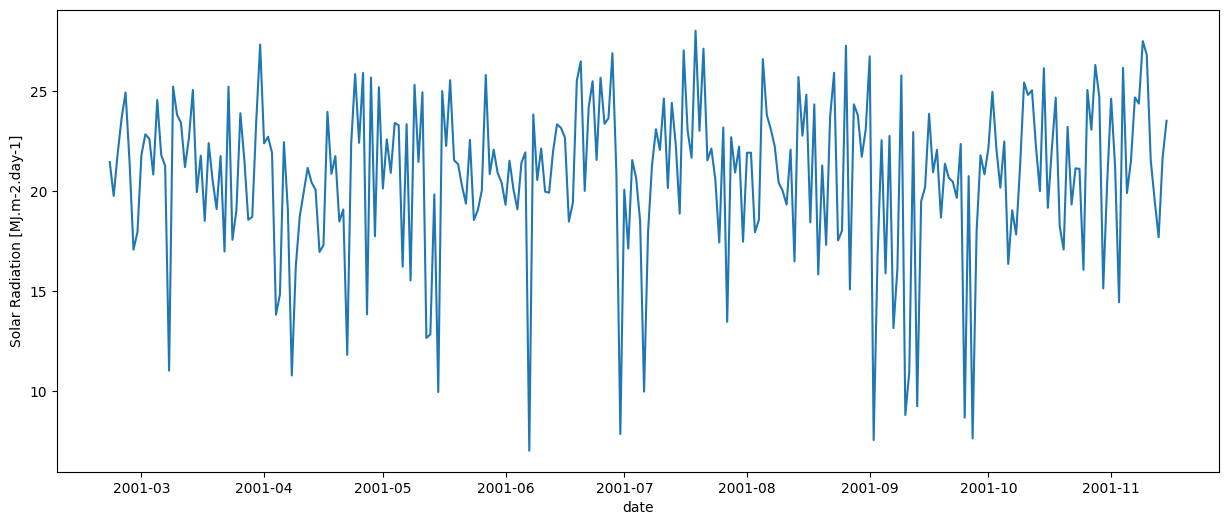

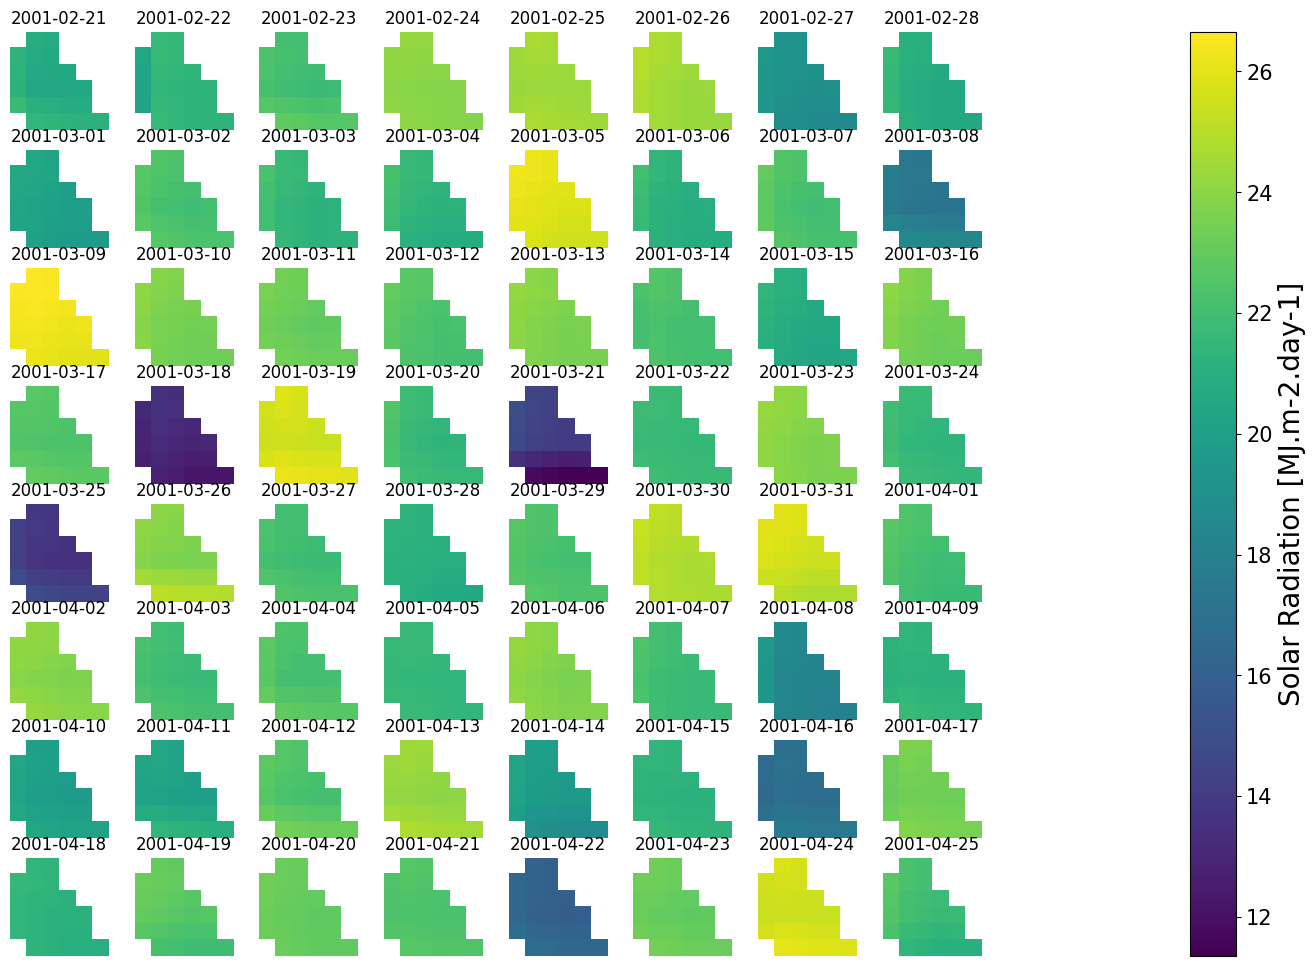

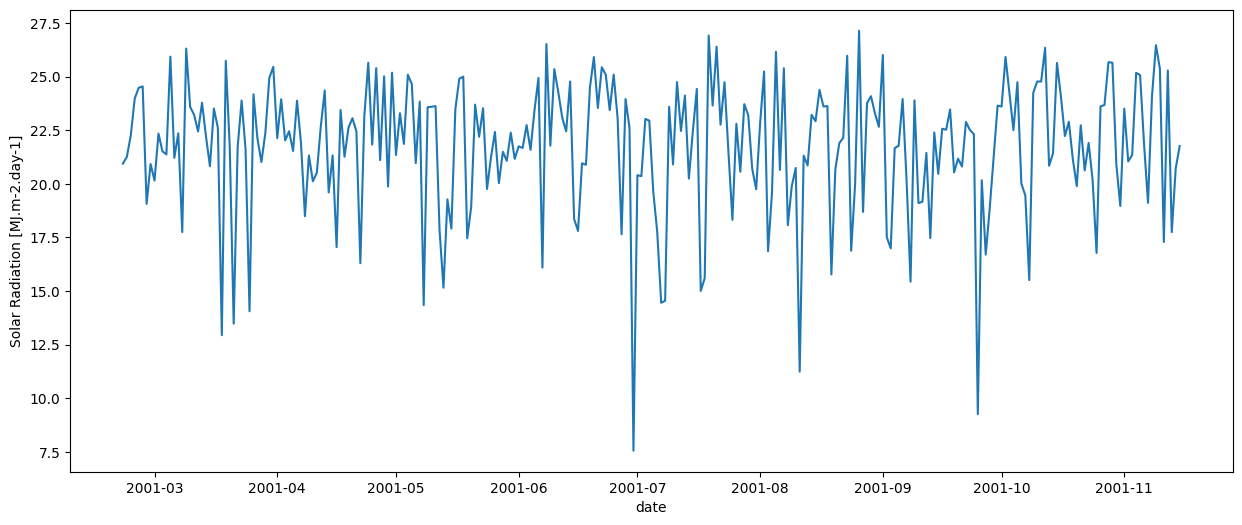

In [13]:
import ipywidgets as widgets

import numpy as np

from spatialdata.plt_funs import plot_datacube
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from IPython.display import display, clear_output

# Define the dropdown options
dropdown = widgets.Dropdown(
    options= np.sort(subset[categories_column_name].values),
    value=np.sort(subset[categories_column_name].values)[0],  # Default selected value
    description=f'Select (area > 50km2) {categories_column_name}',
    disabled=False,
)

# Define what happens when a selection is made
#output = widgets.Output()
output = widgets.Output(layout = widgets.Layout(height='400px'))

def on_value_change(change):

    with output:
        output.clear_output()
        plt.close()
        category_name = change['new']

        roi = subset.loc[subset[categories_column_name] == category_name]
        area = roi['KM2'].values[0]
        print(f'{category_name} area {area}')
        mltdata_masked = wdatacube.mask_mldata(mltdata_c, roi.geometry,clip=True)
        f,a = plot_datacube(mltdata_masked, variable='srad', limit= 64, ncols=8, nrows=8, figsize = (18,12), invertaxis = False, label_name ="Solar Radiation [MJ.m-2.day-1]", legfontsize = 20)
        df = wdatacube.to_dataframe(mltdata_masked)
        dfsumm = df.groupby(['date'], dropna=True).agg({'precipitation': 'mean', 'srad': 'mean'})
        df_ = dfsumm.reset_index()
        f, ax = plt.subplots(figsize = (15,6))
        ax.set_xlabel("date")
        ax.set_ylabel("Solar Radiation [MJ.m-2.day-1]")
        ax.plot(df_.date, df_.srad)

        show_inline_matplotlib_plots()
        clear_output()

# Attach the callback function to the dropdown
dropdown.observe(on_value_change, names='value')

# Display the dropdown
display(dropdown, output)

#### Export Data as DataFrame
In this section, we export the processed weather data into a pandas DataFrame formats. The data will be saved as a CSV file for a specific region of interest (ROI).



In [33]:
import os

output_path = r'D:\OneDrive - CGIAR\projects\suelos_honduras\spatial_files\tabular\hnd'

# Create the output directory if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Specify the locality of interest
locality = 'Locomapa No.1'

roi = gdf.loc[gdf[categories_column_name] == locality]
mltdata_masked = wdatacube.mask_mldata(mltdata_c, roi.geometry,clip=True)

df = wdatacube.to_dataframe(mltdata_masked).reset_index()
# Summarize the data by grouping it by date and calculating mean values for weather variables
dfsumm = df.groupby(['date'], dropna=True).agg({
    'x':'mean',
    'y':'mean',
    #'tmax': 'mean',
    #'tmin': 'mean',
    'srad': 'mean',
    'precipitation': 'mean'
})
df_ = dfsumm.reset_index()

df_.to_csv(os.path.join(output_path, 'weather_{}.csv'.format(locality)), index=False)


100%|██████████| 268/268 [00:00<00:00, 407.24it/s]


#### Export Data as a raster
In this section, we export the processed weather data into a raster. The data will be saved as a Tif file for a specific region of interest (ROI).


In [15]:
### export single raster
mltdata_masked['20011021'].srad.rio.to_raster('srad_example.tif')


### Create Soil information Data Cube
In this section, we will create a soil data cube to organize and process soil information across a different depths. The data cube will facilitate analysis of various soil variables, including clay, sand, silt, soil organic content, nitrogen, among others. Currently the information is downloaded from [SoilGrids](https://soilgrids.org/).



#### Download data
First, we load the configuration file that defines the parameters for the soil data download, such as the variables, geographical extent, the output folder path, and the depth.

Those parameters are pointed out on a configuration file called **"soil_data_downloading_config.yaml"**


In [20]:
from spatialdata.soil_data import SoilGridDataDonwload
from spatialdata.gis_functions import get_boundaries_from_path

config = OmegaConf.load("options/soil_data_downloading_config.yaml")

outputpath = os.path.join(config.PATHS.output_path, config.GENERAL.suffix)

x1, y1, x2, y2 = get_boundaries_from_path(config.SPATIAL_INFO.boundaries,
                                    config.SPATIAL_INFO.crs, round_numbers = True)

soildata = SoilGridDataDonwload(soil_layers= config.SOIL.variables,
                            depths= config.SOIL.depths,
                            output_folder= outputpath)

soildata.download_soilgrid(boundaries= [x1, y1, x2, y2])



File created: clay_0-5cm_mean.tif 
File created: clay_5-15cm_mean.tif 
File created: clay_15-30cm_mean.tif 
File created: clay_30-60cm_mean.tif 
File created: sand_0-5cm_mean.tif 
File created: sand_5-15cm_mean.tif 
File created: sand_15-30cm_mean.tif 
File created: sand_30-60cm_mean.tif 
File created: silt_0-5cm_mean.tif 
File created: silt_5-15cm_mean.tif 
File created: silt_15-30cm_mean.tif 
File created: silt_30-60cm_mean.tif 
https://files.isric.org/soilgrids/latest/data_aggregated/1000m/wv0010/wv0010_0-5cm_mean_1000.tif
File created: wv0010_0-5cm_mean.tif 
https://files.isric.org/soilgrids/latest/data_aggregated/1000m/wv0010/wv0010_5-15cm_mean_1000.tif
File created: wv0010_5-15cm_mean.tif 
https://files.isric.org/soilgrids/latest/data_aggregated/1000m/wv0010/wv0010_15-30cm_mean_1000.tif
File created: wv0010_15-30cm_mean.tif 
https://files.isric.org/soilgrids/latest/data_aggregated/1000m/wv0010/wv0010_30-60cm_mean_1000.tif
File created: wv0010_30-60cm_mean.tif 
File created: cec_0

#### Setup Directory Paths and Variables to Fetch

Next, we define the directory paths where the soil data is placed.

In [2]:
paths = r'soil/hnd'


#### Create soil Data Cube
We now set up an instance of the **SoilDataCube** class, which process soil data and allows us to stack the data by depth. We specify the date soil variables to fetch and create a data cube.



In [3]:
from spatialdata.files_manager import SoilFolderManager
from spatialdata.soil_data import SoilDataCube

folder_manager = SoilFolderManager(paths, ["clay",  "sand", "silt", "wv0010","cec", "wv0033", "wv1500"])
soilcube = SoilDataCube(folder_manager)
soildata_dict = soilcube.multi_depth_data(verbose=False)


  0%|          | 0/4 [00:00<?, ?it/s]

{'clay': 'soil/hnd/clay_0-5cm_mean_30s.tif', 'sand': 'soil/hnd/sand_0-5cm_mean_30s.tif', 'silt': 'soil/hnd/silt_0-5cm_mean_30s.tif', 'wv0010': 'soil/hnd/wv0010_0-5cm_mean_1000.tif', 'cec': 'soil/hnd/cec_0-5cm_mean_30s.tif', 'wv0033': 'soil/hnd/wv0033_0-5cm_mean_1000.tif', 'wv1500': 'soil/hnd/wv1500_0-5cm_mean_1000.tif'}


 25%|██▌       | 1/4 [00:04<00:13,  4.66s/it]

{'clay': 'soil/hnd/clay_5-15cm_mean_30s.tif', 'sand': 'soil/hnd/sand_5-15cm_mean_30s.tif', 'silt': 'soil/hnd/silt_5-15cm_mean_30s.tif', 'wv0010': 'soil/hnd/wv0010_5-15cm_mean_1000.tif', 'cec': 'soil/hnd/cec_5-15cm_mean_30s.tif', 'wv0033': 'soil/hnd/wv0033_5-15cm_mean_1000.tif', 'wv1500': 'soil/hnd/wv1500_5-15cm_mean_1000.tif'}


 50%|█████     | 2/4 [00:07<00:06,  3.35s/it]

{'clay': 'soil/hnd/clay_15-30cm_mean_30s.tif', 'sand': 'soil/hnd/sand_15-30cm_mean_30s.tif', 'silt': 'soil/hnd/silt_15-30cm_mean_30s.tif', 'wv0010': 'soil/hnd/wv0010_15-30cm_mean_1000.tif', 'cec': 'soil/hnd/cec_15-30cm_mean_30s.tif', 'wv0033': 'soil/hnd/wv0033_15-30cm_mean_1000.tif', 'wv1500': 'soil/hnd/wv1500_15-30cm_mean_1000.tif'}


 75%|███████▌  | 3/4 [00:08<00:02,  2.60s/it]

{'clay': 'soil/hnd/clay_30-60cm_mean_30s.tif', 'sand': 'soil/hnd/sand_30-60cm_mean_30s.tif', 'silt': 'soil/hnd/silt_30-60cm_mean_30s.tif', 'wv0010': 'soil/hnd/wv0010_30-60cm_mean_1000.tif', 'cec': 'soil/hnd/cec_30-60cm_mean_30s.tif', 'wv0033': 'soil/hnd/wv0033_30-60cm_mean_1000.tif', 'wv1500': 'soil/hnd/wv1500_30-60cm_mean_1000.tif'}


100%|██████████| 4/4 [00:10<00:00,  2.72s/it]


#### Standardize Units

To ensure consistency across the dataset, we standardize the units of the weather variables. For instance, solar radiation is converted from joules to megajoules, and temperatures are converted from Kelvin to Celsius.

In [4]:
soildata_dict_c = {}
for d, v in soildata_dict.items():
    v['clay'] = v['clay'] * 0.1  # Convert clay g.kg-1 to percent
    v['silt'] = v['silt'] * 0.1  # Convert silt g.kg-1 to percent
    v['sand'] = v['sand'] * 0.1  # Convert sand g.kg-1 to percent
    soildata_dict_c[d] = v

#### Get Data for each "Aldea"

In previous example, we extracted data for a bigger extension, now we will extract and visualize data for a specific locality, in this case "Aldea" in Honduras.

Finally, we visualize the soil data using maps.

In [5]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

gdf = gpd.read_file('data/tb_limitealdeas.shp')
print(gdf.columns)
categories_column_name = "ALDEA"
subset = gdf.loc[gdf.KM2>50]

Index(['GEOCODIGO', 'ALDEA', 'COD_ALDEA', 'COD_MUNI', 'COD_DEPTO', 'KM2',
       'DENSIDAD', 'MUNI', 'DEPTO', 'AREA_HA', 'geometry'],
      dtype='object')


In [26]:
from spatialdata.soil_data import find_soil_textural_class_in_nparray, TEXTURE_CLASSES
import ipywidgets as widgets
from IPython.display import display
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from spatialdata.plt_funs import plot_datacube


def calculate_texture_map_from_xarray(xrdata):
    sand = xrdata.sand.values.astype(np.int64)
    sand[sand<0] = 0
    clay = xrdata.clay.values.astype(np.int64)
    clay[clay<0] = 0

    return find_soil_textural_class_in_nparray(sand, clay)

# Define the dropdown options
dropdown2 = widgets.Dropdown(
    options= np.sort(subset[categories_column_name].values),
    value=np.sort(subset[categories_column_name].values)[0],  # Default selected value
    description=f'Select (area > 50km2) {categories_column_name}',
    disabled=False,
)

dropdown1 = widgets.Dropdown(
    options= list(soildata_dict['0-5'].data_vars.keys()),
    value=list(soildata_dict['0-5'].data_vars.keys())[1],  # Default selected value
    description=f'Select soil property',
    disabled=False,
)

output = widgets.Output(layout = widgets.Layout(height='400px'))

def update_plot(var, locality):
    with output:
        output.clear_output()
        plt.close()

        roi = subset.loc[subset[categories_column_name] == locality]
        area = roi['KM2'].values[0]

        print(f'{locality} area {area}')
        soildata_masked = soilcube.mask_mldata(soildata_dict_c, roi.geometry,clip=True)
        f,a = plot_datacube(soildata_masked,dates=False, variable=var, limit= 4, ncols=4, nrows=1, figsize = (10,5), invertaxis = False, label_name =var, legfontsize = 20)
        f,a = plt.subplots(nrows = 1, ncols=4, figsize = (15,8) )
        for i, k in enumerate(soildata_masked.keys()):
            d = calculate_texture_map_from_xarray(soildata_masked[k])
            a[i].imshow(d)
            total = np.sum(d >0)
            dictclass = {}
            for j in np.unique(d):
                if j != 0:
                    dictclass[str(TEXTURE_CLASSES[int(j)])] = int((np.sum(d == j)/total)*100)
            a[i].set_title('{}\n{}'.format(k, dictclass))


        plt.show()
        show_inline_matplotlib_plots()


def on_value_change(change):
    update_plot(dropdown1.value, dropdown2.value)


dropdown1.observe(on_value_change, names='value')
dropdown2.observe(on_value_change, names='value')


# Display the dropdown
display(dropdown1, dropdown2, output)
#update_plot()

Dropdown(description='Select soil property', index=1, options=('wv0033', 'clay', 'sand', 'silt', 'wv0010', 'ce…

Dropdown(description='Select (area > 50km2) ALDEA', options=('Agalteca', 'Agua Blanca', 'Agua Blanca', 'Agua C…

Output(layout=Layout(height='400px'))

#### Export Data as DataFrame
In this section, we export the processed data data into a pandas DataFrame format. The data will be saved as a CSV file for a specific region of interest (ROI).


In [6]:
import os

output_path = r'D:\OneDrive - CGIAR\projects\suelos_honduras\spatial_files\tabular\hnd'

# Create the output directory if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Specify the locality of interest
locality = 'Locomapa No.1'

roi = gdf.loc[gdf[categories_column_name] == locality]
soildata_masked = soilcube.mask_mldata(soildata_dict_c, roi.geometry,clip=True)

df = soilcube.to_dataframe(soildata_masked).reset_index()
# Summarize the data by grouping it by date and calculating mean values for weather variables
dfsumm = df.groupby(['depth'], dropna=False).agg({
    'x':'mean',
    'y':'mean',
    'sand': 'mean',
    'silt': 'mean',
    'clay': 'mean',
})
df_ = dfsumm.reset_index()

df_.to_csv(os.path.join(output_path, 'soil_{}.csv'.format(locality)), index=False)

100%|██████████| 4/4 [00:00<00:00, 236.90it/s]


#### Export Data as a raster
In this section, we export the processed soil data into a raster. The data will be saved as a Tif file for a specific region of interest (ROI).


In [8]:
### export single raster
soildata_masked['0-5'].clay.rio.to_raster('clay_example.tif')